# 실습 - 허리케인 피해 지역 구분하기


## 개요
  - 허리케인이 지나간 위치의 위성 이미지를 보고, 피해 여부를 판단하는 모델을 만들어 봅시다.

## 목표
  - validation dataset 에 대해 95% 이상의 정확도를 가지는 것이 목표입니다.

In [1]:
import urllib
import zipfile

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def download_and_extract_data():
    url = 'https://storage.googleapis.com/download.tensorflow.org/data/certificate/satellitehurricaneimages.zip'
    urllib.request.urlretrieve(url, 'satellitehurricaneimages.zip')
    with zipfile.ZipFile('satellitehurricaneimages.zip', 'r') as zip_ref:
        zip_ref.extractall()

download_and_extract_data()

# 1 & 2. 데이터 준비 & 이미지 전처리

  - 다운로드 받은 데이터를 읽어서 준비합니다.
  - 전처리를 수행합니다.

In [10]:
IMG_SIZE = 128
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(
          rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'train/', 
    target_size= (IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'validation/',
    target_size= (IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# 3. 모델 정의

  - 모델 모양을 정의합니다.
  - Input, Output 모양을 유의하세요.

In [5]:
model = tf.keras.models.Sequential([
    # 함수 내용을 작성하세요.
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

C:\Users\User\miniconda3\envs\dl\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 4. 모델 컴파일

  - 학습 방법을 정의하세요
  - loss, optimizer, metrics 를 올바르게 지정하면 충분합니다.

In [6]:
model.compile(
    # 함수 내용을 작성하세요.
    optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy']
)

# 5. 모델 학습

  - 학습을 위한 epoch, batch_size 등을 설정하세요.
  - 이 외에 사용하고 싶은 기법들은 자유롭게 도입하셔도 됩니다.

In [11]:
model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=10,
        batch_size=BATCH_SIZE
)

Epoch 1/10


C:\Users\User\miniconda3\envs\dl\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 207ms/step - accuracy: 0.9175 - loss: 0.2193 - val_accuracy: 0.9375 - val_loss: 0.1655
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 206ms/step - accuracy: 0.9295 - loss: 0.1730 - val_accuracy: 0.9560 - val_loss: 0.1184
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 205ms/step - accuracy: 0.9450 - loss: 0.1468 - val_accuracy: 0.9605 - val_loss: 0.1032
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 207ms/step - accuracy: 0.9455 - loss: 0.1384 - val_accuracy: 0.9525 - val_loss: 0.1216
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 211ms/step - accuracy: 0.9431 - loss: 0.1444 - val_accuracy: 0.9585 - val_loss: 0.1127
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 207ms/step - accuracy: 0.9455 - loss: 0.1367 - val_accuracy: 0.9670 - val_loss: 0.0918
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 207ms/step - accuracy: 0.9436 - loss: 0.1510 - val_accuracy: 0.9585 - val_loss: 0.1092
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 207ms/step - accuracy: 0.9474 - loss: 0.1341 - val

# Appendix

- 이미지를 View 합니다.
- model 로 predict 를 합니다.

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Take one batch of images and labels
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='validation/',
    image_size= (IMG_SIZE,IMG_SIZE)
    , batch_size=BATCH_SIZE)

Found 2000 files belonging to 2 classes.


In [13]:
images, labels = next(iter(val_ds.shuffle(buffer_size=10000)))

In [16]:
images[0]

tensorflow.python.framework.ops.EagerTensor

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


C:\Users\User\AppData\Local\Temp\ipykernel_15696\3009641869.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = int(predictions.round())


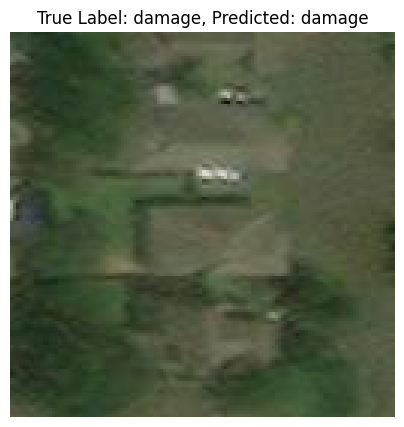

In [17]:
data_index = 19

selected_image = images[data_index].numpy().astype("uint8")
selected_label = labels[data_index].numpy()

image_to_predict = np.expand_dims(selected_image/255, axis=0)

# Make a prediction
predictions = model.predict(image_to_predict)
predicted_label = int(predictions.round())

plt.figure(figsize=(5,5))
plt.imshow(selected_image)
class_names = val_ds.class_names
plt.title(f"True Label: {class_names[selected_label]}, Predicted: {class_names[predicted_label]}")
plt.axis("off")
plt.show()

# Transfer Learning

- transfer learning 을 이용해서도 풀어봅시다.

In [ ]:
# 자유롭게 작성하세요.